# customer segmentation with K-Means algorithm

## 1- Introduction

In this project, I use a dataset from the **Kaggle website** and cluster bank credit card customers into different groups based on the **K-means model**. It has been tried to cluster customers into the clusters and groups introduced in the following study:  
https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/financial%20services/latest%20thinking/payments/mop19_new%20frontiers%20in%20credit%20card%20segmentation.ashx  

**Data Address**: 
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [23]:
#importing necessary libraries and packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# magic word for producing visualizations in notebook
%matplotlib inline
# For Standardisation
from sklearn.preprocessing import StandardScaler
# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
# For K-means
from sklearn.cluster import KMeans
# For PCA
from sklearn.decomposition import PCA

## 2- loading data and doing some explorations

In [24]:
#importing data
data_seg=pd.read_csv ('Customer_Data (1).csv',index_col=0)

In [25]:
data_seg.head ()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
data_seg.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


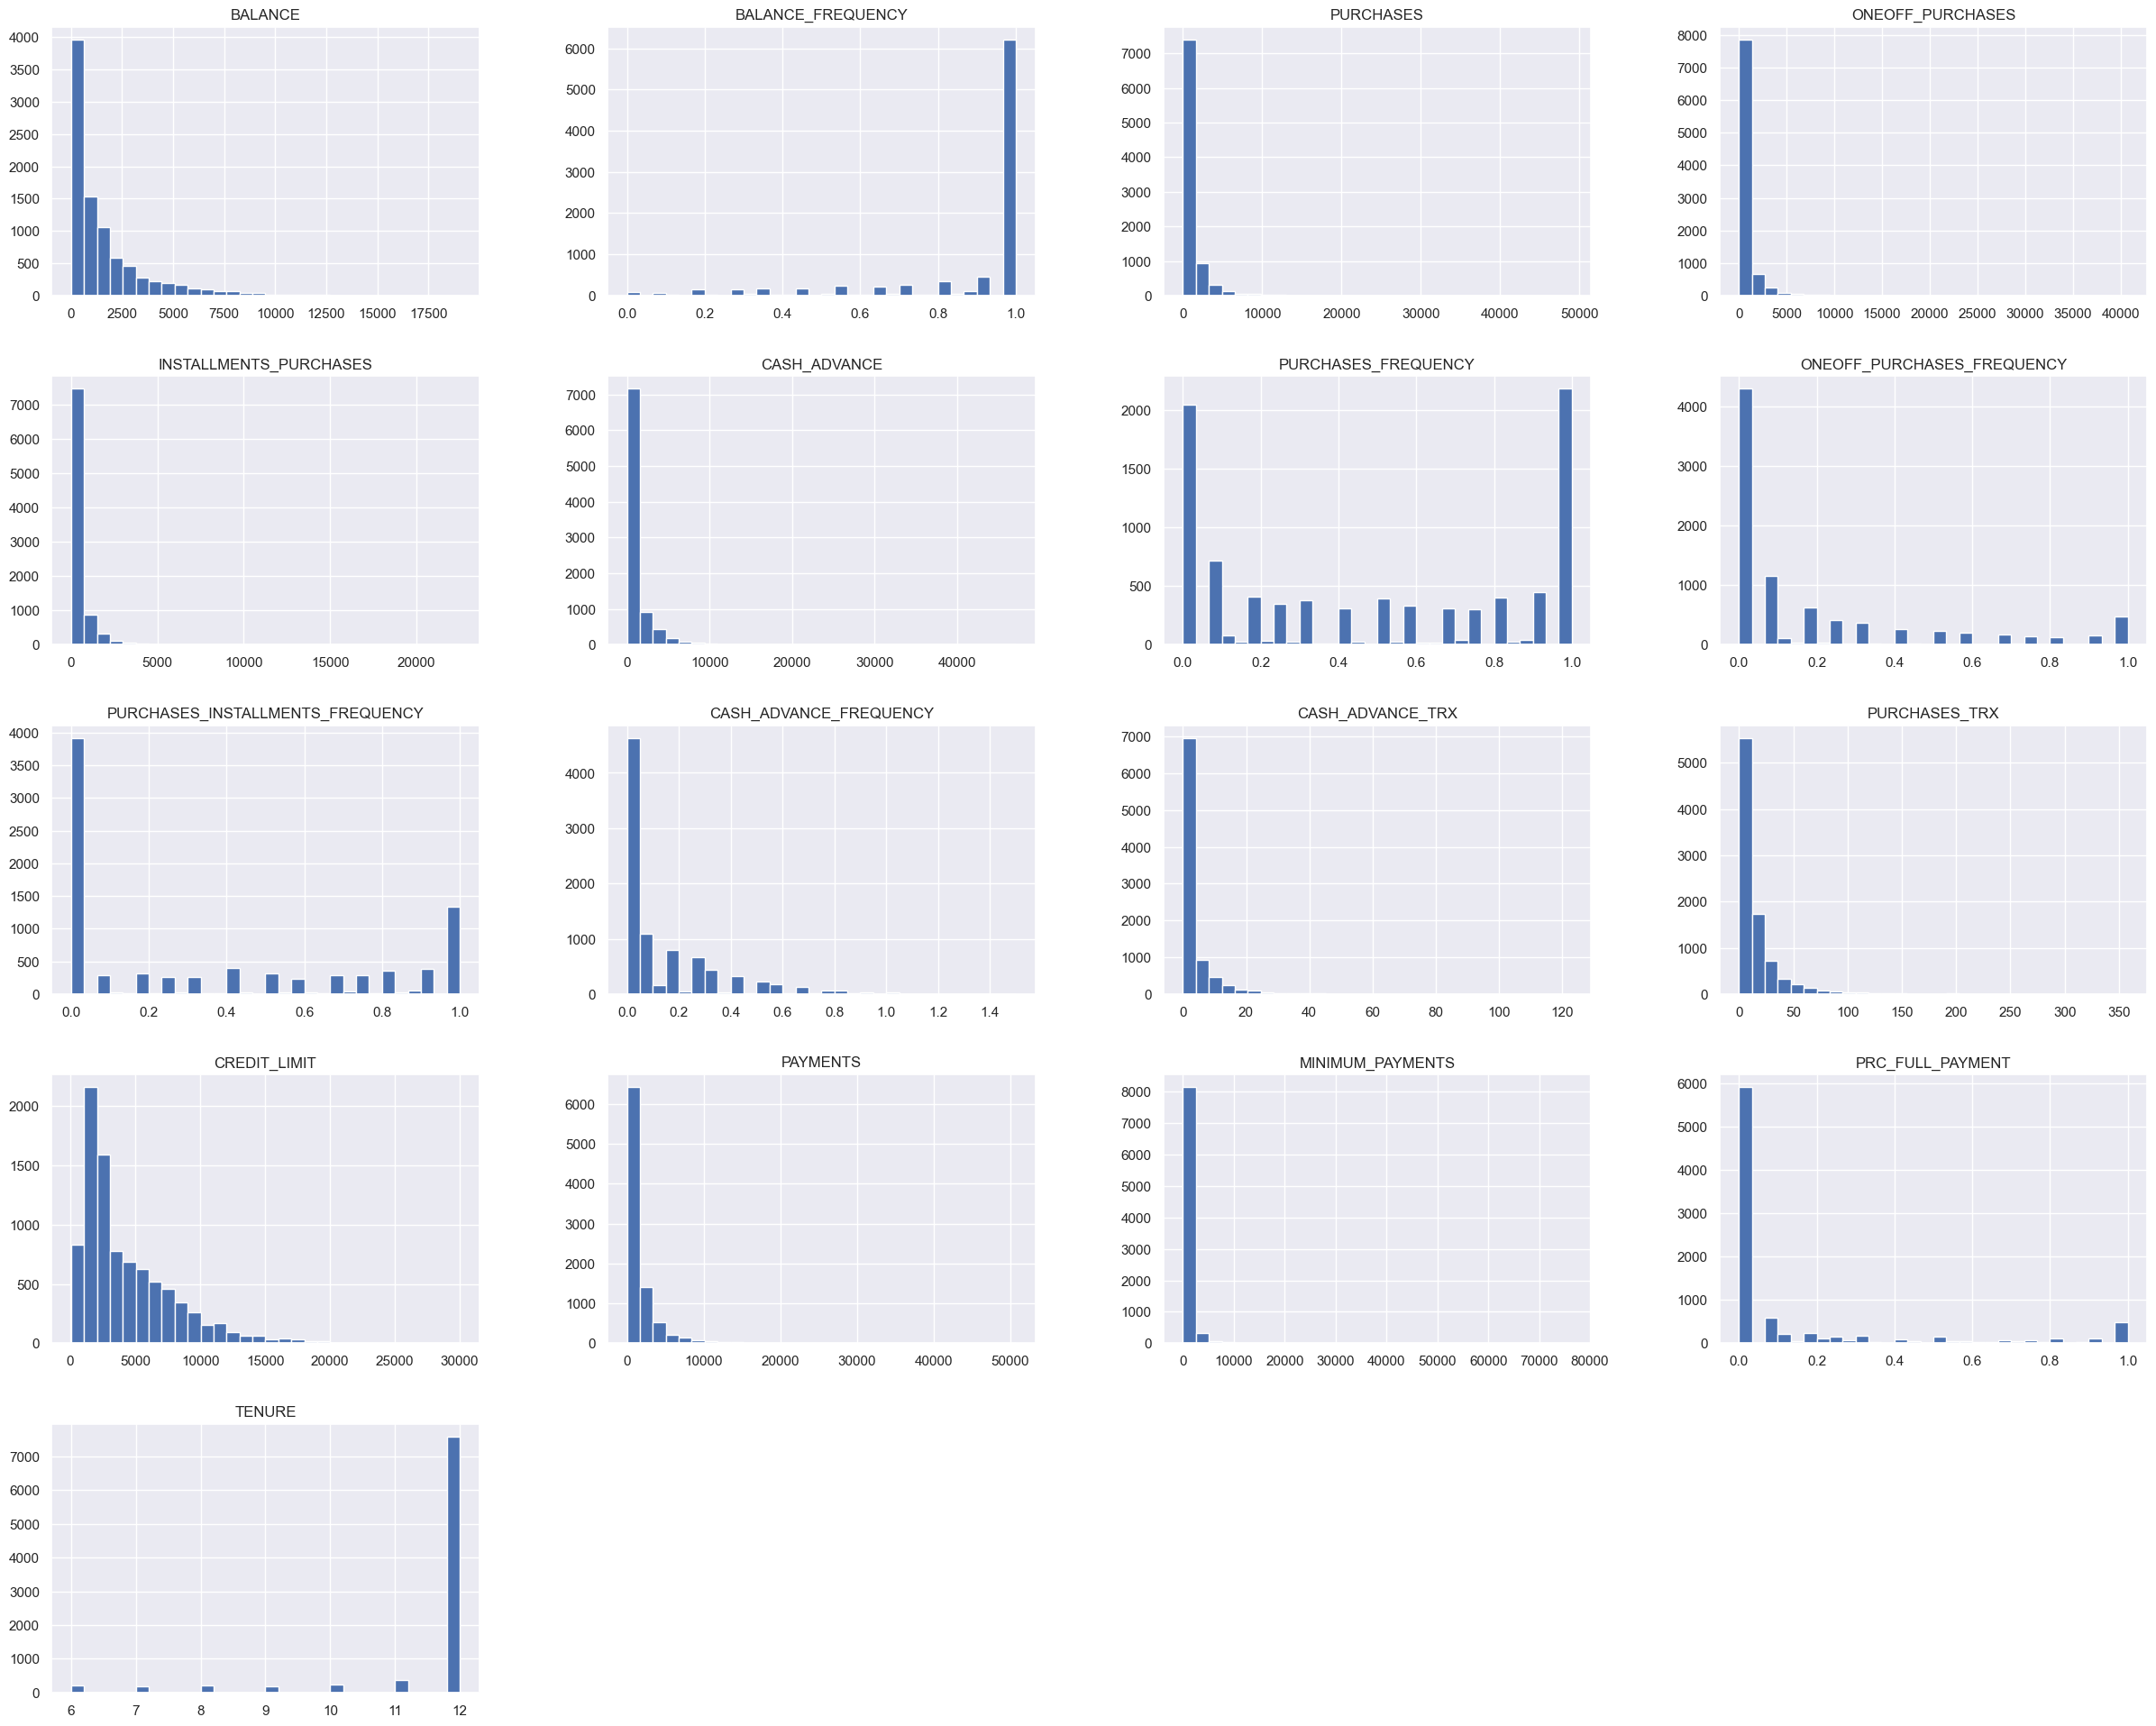

In [27]:
_=data_seg.hist(bins=30, figsize=(30, 24))

From the above histogram, we can conclude that almost all the variables are very **skewed and not symmetrical**.

In [28]:
data_seg.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Exploring the correlation between the features is the first step to identifying similar customers and putting them together in groups which is the essence of segmentation. In the above correlation matrix we can see that **PURCHASES Variable** have a high correlation with PURCHASES_TRX and PAYMENTS variables. It seems quite logical that the more the number of purchases, the higher the probability of the total purchase amount. Also, people who make more purchases with credit cards try to make their payments regularly and therefore the PAYMENTS level will be higher. People who use a credit card in the form of cash advance will also have a lower purchase amount (negative correlation between PURCHASES and CASH_ADVANCE).

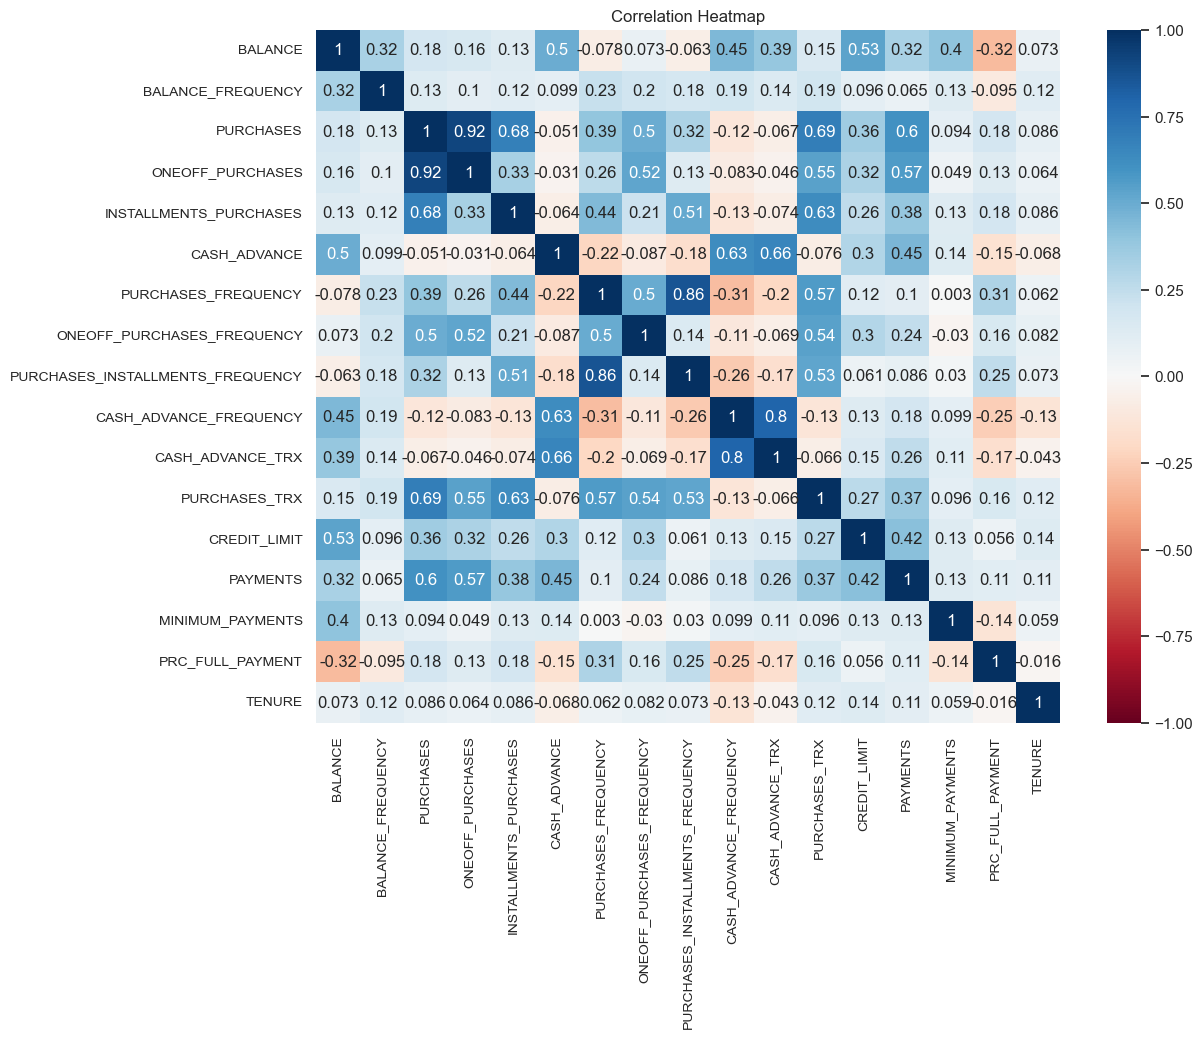

In [29]:
#Correlation heatmap
plt.figure(figsize=(12,9))
Vis=sns.heatmap(data_seg.corr(),annot=True, cmap='RdBu',vmin=-1,vmax=1)
Vis.set_yticklabels(Vis.get_yticklabels(),rotation=0,fontsize=10)
Vis.set_xticklabels(Vis.get_xticklabels(),rotation=90,fontsize=10)
plt.title ('Correlation Heatmap')
plt.show ()

## 3- Preprocessing

### 3-1- Checking for missing values

In [30]:
data_seg.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

For CREDIT_LIMIT we use the **median** of all values to replace the only missing value.

In [31]:
data_seg['CREDIT_LIMIT'].fillna(data_seg['CREDIT_LIMIT'].median(),inplace=True)

In [32]:
data_seg.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

But for the MINIMUM_PAYMENTS variable, we use the **mean values** to replace the missing values.

In [33]:
data_seg['MINIMUM_PAYMENTS'].fillna(data_seg['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [34]:
data_seg.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

As can be seen, there is no more missing data.

### 3-2- Balancing purchase data (Purchase=ONEOFF_PURCHASES+INSTALLMENTS_PURCHASES)

In [35]:
UnbalPurchase=data_seg.loc[round(data_seg['PURCHASES'],2)!=round((data_seg['ONEOFF_PURCHASES']\
                           +data_seg['INSTALLMENTS_PURCHASES']),2)]
UnbalPurchase

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10533,32.042424,0.909091,400.41,0.00,489.39,0.000000,0.833333,0.000000,0.750000,0.000000,0,11,4500.0,353.570259,132.131820,0.666667,12
C10772,1544.979869,1.000000,880.19,0.00,927.45,0.000000,1.000000,0.000000,1.000000,0.000000,0,46,1500.0,1189.503063,1104.152962,0.000000,12
C10940,939.152528,1.000000,3393.25,3364.59,77.66,0.000000,0.250000,0.250000,0.083333,0.000000,0,5,9000.0,2768.821579,267.093439,0.000000,12
C11506,4.382924,0.272727,130.24,0.00,152.24,0.000000,0.083333,0.000000,0.083333,0.000000,0,0,14000.0,28988.973880,1092.184812,0.500000,12
C14099,2552.597938,1.000000,550.62,0.00,583.95,0.000000,1.000000,0.000000,0.916667,0.000000,0,24,3000.0,478.632499,1080.350480,0.000000,12
C14810,1089.795044,1.000000,0.00,0.00,20.00,38.249993,0.000000,0.000000,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12
C15378,30.692503,0.454545,205.06,0.00,607.76,0.000000,0.916667,0.000000,1.000000,0.000000,0,35,4500.0,163.982192,55.660981,0.000000,12
C15508,3093.592745,1.000000,47.69,82.41,0.00,1438.951061,0.166667,0.083333,0.000000,0.583333,15,1,4100.0,4591.237633,723.343619,0.000000,12
C15897,10243.147630,1.000000,0.00,0.00,66.95,4501.067550,0.000000,0.000000,0.083333,0.250000,5,0,13000.0,1882.490974,5624.605818,0.000000,12


In [36]:
#We recalculate Purchase as the sum of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES
data_seg.loc[:,'PURCHASES']=data_seg.loc[:,'ONEOFF_PURCHASES']+data_seg.loc[:,'INSTALLMENTS_PURCHASES']

### 3-3- Standardisation

In [37]:
sc= StandardScaler()
data_seg_st= sc.fit_transform(data_seg)

## 4- K- means Clustering

### 4-1- determining the number of clusters

#### 4-1-1- determining the number of clusters by Hierarchical Clustering 

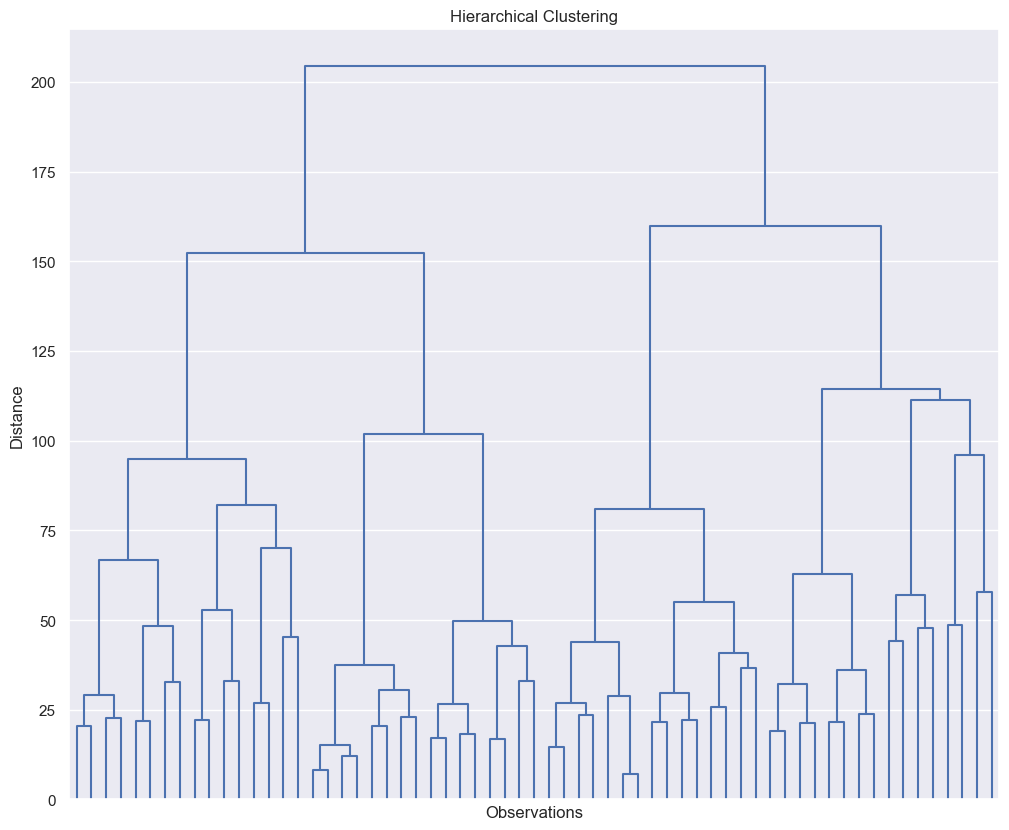

In [38]:
HClustering= linkage(data_seg_st,method='ward')
plt.figure (figsize=(12,10))
plt.title ('Hierarchical Clustering')
plt.xlabel ('Observations')
plt.ylabel ('Distance')
dendrogram (HClustering, truncate_mode='level', p=5, show_leaf_counts=False, no_labels=True, color_threshold=0)
plt.show()

By looking at the dendrogram diagram in general, we can have a general view about the number of suitable clusters. According to the obtained result, the number of 5 clusters can be considered reasonable.

#### 4-1-2- determining the number of clusters by Elbow method

We run the algorithm for 10 different times with 10 different number of clusters. We calculate **the Within Cluster Sum of Squares (WCSS)** for each of the clustering solutions.

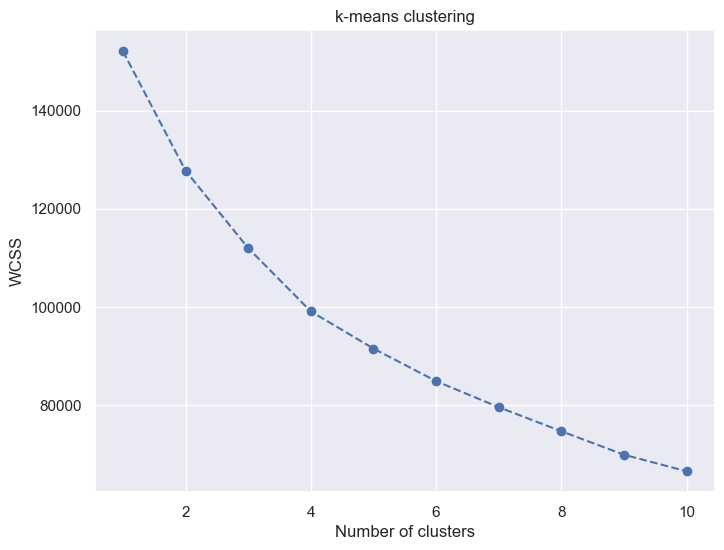

In [39]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans (n_clusters=i, init='k-means++',random_state=123)
    kmeans.fit(data_seg_st)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot (range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel ('Number of clusters')
plt.ylabel ('WCSS')
plt.title('k-means clustering')
plt.show()

Here, the use of 5 clusters can be reasonable, and since we want to map the number of five clusters introduced in the McKinsey study, we set the number of clusters to 5.

### 4-2- Running the model and the results

In [40]:
kmeans=KMeans (n_clusters=5, init='k-means++', random_state=123)
kmeans.fit (data_seg_st)

KMeans(n_clusters=5, random_state=123)

In [41]:
#Results
data_seg_kmeans=data_seg.copy()
data_seg_kmeans['K-means segment']=kmeans.labels_

In [42]:
data_seg_results=data_seg_kmeans.groupby(['K-means segment']).mean()
data_seg_results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
K-means segment,,,,,,,,,,,,,,,,,
0,1894.697328,0.979455,2918.342726,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925
1,1055.782527,0.797277,278.903627,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.319816,1005.956760,600.575314,0.070492,11.455241
2,645.271105,0.902145,798.373466,166.799462,631.574004,178.022789,0.856492,0.083437,0.794013,0.038031,0.709317,16.644720,3199.298680,934.485329,678.731868,0.271871,11.455072
3,4622.768927,0.967852,495.021904,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913
4,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


I have named the clusters based on the **McKinsey study** as follows:  
Cluster 0: Customers with relatively moderate balance and high purchases and  purchase transactions: "**SelfAwareAvoiders**" 

Cluster 1: Customers with low balance and the lowest purchases: "**RecoveringCreditUsers**"

Cluster 2: Customers with the lowest Balance, Oneoff purchases and Cash_advance, and with relatively high purchase frequency: "**FinanciallyStressed**"  

Cluster 3: Customers with highest balance and Cash_advance and low amount of purchases : "**DealChasers**" 

Cluster 4: Customers with high balance, the highest purchases (mostly one-off purchases) and purchase transactions and credit limit: "**ProsperousAndConsent**"

In [43]:
#Number of Observations in each cluster
data_seg_results ['NObservations']= data_seg_kmeans[['K-means segment','PURCHASES']].groupby (['K-means segment']).count()

#proportion of observations
data_seg_results ['PropObservations']=data_seg_results ['NObservations']/data_seg_results ['NObservations'].sum()
data_seg_results=data_seg_results.rename ({0: 'SelfAwareAvoiders', 1: 'RecoveringCreditUsers', 2: 'FinanciallyStressed'\
                                           , 3: 'DealChasers', 4:'ProsperousAndConsent'})
data_seg_results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,NObservations,PropObservations
K-means segment,,,,,,,,,,,,,,,,,,,
SelfAwareAvoiders,1894.697328,0.979455,2918.342726,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925,1383,0.154525
RecoveringCreditUsers,1055.782527,0.797277,278.903627,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.319816,1005.956760,600.575314,0.070492,11.455241,3921,0.438101
FinanciallyStressed,645.271105,0.902145,798.373466,166.799462,631.574004,178.022789,0.856492,0.083437,0.794013,0.038031,0.709317,16.644720,3199.298680,934.485329,678.731868,0.271871,11.455072,2415,0.269832
DealChasers,4622.768927,0.967852,495.021904,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913,1145,0.127933
ProsperousAndConsent,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116,86,0.009609


It can be seen that the two clusters **RecoveringCreditUsers and FinanciallyStressed** make up more than **70 percent** of all customers.